# **DATA QUALITY PROJECT GALTIERI_CATARINELLA**

![Data Preparation Pipeline](/Project/Data%20Preparation%20Pipeline.PNG)

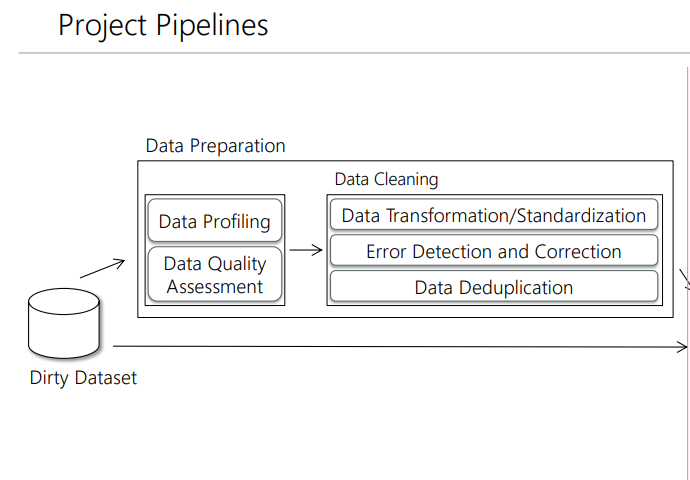

In [15]:
from IPython.display import Image, display

# Display the uploaded image
display(Image(filename=r'C:\Users\User\Desktop\OneDrive - Universita degli Studi Roma Tre\Desktop\Programming\Data Quality\Data-Quality-Repo\Project\Data Preparation Pipeline.PNG'))

In [10]:
import pandas as pd
import numpy as np
from datetime import datetime

In [11]:
SERVICES = pd.read_csv(r'C:\Users\User\Desktop\OneDrive - Universita degli Studi Roma Tre\Desktop\Programming\Data Quality\Data-Quality-Repo\Project\Comune-di-Milano-Servizi-alla-persona-parrucchieri-estetisti(in).csv',sep=';',encoding='unicode_escape')
SERVICES

,Tipo esercizio pa,Ubicazione,Tipo via,Via,Civico,Codice via,ZD,Prevalente,Superficie altri usi,Superficie lavorativa
0,NaN,LGO DEI GELSOMINI N. 10 (z.d. 6),LGO,DEI GELSOMINI,10,5394.0,6,NaN,NaN,55.0
1,NaN,PZA FIDIA N. 3 (z.d. 9),PZA,FIDIA,3,1144.0,9,CENTRO MASSAGGI RILASSANTI NON ESTETICI,2.0,28.0
2,NaN,VIA ADIGE N. 10 (z.d. 5),VIA,ADIGE,10,4216.0,5,CENTRO BENESSERE,2.0,27.0
3,NaN,VIA BARACCHINI FLAVIO N. 9 (z.d. 1),VIA,BARACCHINI FLAVIO,9,356.0,1,TRUCCO SEMIPERMANENTE,NaN,NaN
4,NaN,VIA BERGAMO N. 12 (z.d. 4),VIA,BERGAMO,12,3189.0,4,NaN,NaN,50.0
...,...,...,...,...,...,...,...,...,...,...
3904,TIPO D ESTET.APPAR.ELETTROMECC;TIPO C TRATT.ES...,VIA SARPI FRA' PAOLO N. 1 con ingr.da v.le mon...,VIA,SARPI FRA' PAOLO,1,7210.0,1,NaN,NaN,NaN
3905,TIPO D ESTET.APPAR.ELETTROMECC;TIPO C TRATT.ES...,CSO DI PORTA TICINESE N. 4 ; (z.d. 1),CSO,DI PORTA TICINESE,4,541.0,1,NaN,NaN,65.0
3906,TIPO D ESTET.APPAR.ELETTROMECC;TIPO C TRATT.ES...,VIA CANDOGLIA N. 2 ; (z.d. 9),VIA,CANDOGLIA,2,1518.0,9,NaN,NaN,NaN
3907,TIPO D ESTET.APPAR.ELETTROMECC;TIPO C TRATT.ES...,VIA NIRONE num.002a; (z.d. 1),VIA,NIRONE,NaN,640.0,1,NaN,NaN,NaN


# **DATA QUALITY ASSESSMENT**

In [12]:
#number of tuples and columns of the data source
SERVICES.shape

(3909, 10)

In [16]:
#for each attribute the system shows the type of data. The type of data is defined analyzing the values
SERVICES.dtypes

Tipo esercizio pa         object
Ubicazione                object
Tipo via                  object
Via                       object
Civico                    object
Codice via               float64
ZD                        object
Prevalente                object
Superficie altri usi     float64
Superficie lavorativa    float64
dtype: object

In [20]:
#duplicated returns a boolean Series denoting the duplicate rows (exact matching)
DUPLICATES = SERVICES.duplicated()
DUPLICATES

0       False
1       False
2       False
3       False
4       False
        ...  
3904    False
3905    False
3906    False
3907    False
3908    False
Length: 3909, dtype: bool

Check for duplicates

In [ ]:
#Check if there are duplicates
print(DUPLICATES.any())

True


In [21]:
SERVICES[DUPLICATES]

,Tipo esercizio pa,Ubicazione,Tipo via,Via,Civico,Codice via,ZD,Prevalente,Superficie altri usi,Superficie lavorativa
88,Acconciatore,VIA CORREGGIO N. 8 (z.d. 7),VIA,CORREGGIO,8,6287.0,7,ACCONCIATORE,NaN,NaN


**Completeness**

In [23]:
#total number of not null values
NOT_NULL = SERVICES.count().sum()
NOT_NULL

np.int64(30891)

In [26]:
#total number of null values
TOTAL_NULL = SERVICES.isnull().sum().sum()
TOTAL_NULL

np.int64(8199)

In [30]:
TOT = TOTAL_NULL + NOT_NULL
if(TOT != SERVICES.shape[0] * SERVICES.shape[1]):
    raise ValueError
TOT

np.int64(39090)

In [32]:
COMPLETENESS = NOT_NULL / TOT
COMPLETENESS = '{0:.1f}%'.format(COMPLETENESS*100)
print(COMPLETENESS)

79.0%


**Accuracy**

Check #	Column(s)	Rule/Check
<br><br>
1	Ubicazione, Via	Verify that "Ubicazione" and "Via" match official street names (cross-check with a valid list).
<br><br>
2	Codice via	Ensure that "Codice via" matches the correct code for the corresponding street (via external data).
<br><br>
3	Civico	Validate that "Civico" (house number) is realistic for the given street (e.g., no negative numbers).
<br><br>
4	ZD	Cross-check "ZD" values against an authoritative list of zones (e.g., zones 1-9 must exist in the area).
<br><br>
5	Superficie lavorativa, Superficie altri usi	Check that the sum of "Superficie" fields is consistent with the real-world building size.
<br><br>

In [36]:
SERVICES = pd.read_csv(r'C:\Users\User\Desktop\OneDrive - Universita degli Studi Roma Tre\Desktop\Programming\Data Quality\Data-Quality-Repo\Project\Csv\Comune-di-Milano-Servizi-alla-persona-parrucchieri-estetisti(in).csv',sep=';',encoding='unicode_escape')

In [37]:
SERVICES.dtypes

Tipo esercizio pa         object
Ubicazione                object
Tipo via                  object
Via                       object
Civico                    object
Codice via               float64
ZD                        object
Prevalente                object
Superficie altri usi     float64
Superficie lavorativa    float64
dtype: object

**Accuracy Tipo esercizio pa**

In [38]:
#maybe check if the Ubicazione is equal to via + tipo via?
TEP_COUNT = SERVICES["Tipo esercizio pa"].value_counts()
TEP_COUNT

Tipo esercizio pa
Parrucchiere per signora                                         1048
ACCONCIATORE                                                      586
Parrucchiere per uomo                                             439
TIPO A - REG.2003                                                 335
TIPO A - REG.2003;TIPO B CENTRO DI ABBRONZATURA                   313
                                                                 ... 
TIPO A - REG.2003;ACCONCIATORE                                      1
TIPO A - REG.2003;TIPO B CENTRO DI ABBRONZATURA;ACCONCIATORE        1
TIPO A - REG.2003;Parrucchiere per uomo                             1
TIPO D ESTET.APPAR.ELETTROMECC;TIPO C TRATT.ESTETICI DIMAGRIM       1
Truccatore                                                          1
Name: count, Length: 103, dtype: int64

In [49]:
# Assuming TEP_COUNT is a pandas Series
# Convert the Series to a DataFrame to save it
tep_df = SERVICES["Tipo esercizio pa"].reset_index()
tep_df.columns = ["Tipo esercizio pa", 0]  # Rename the columns for clarity
# Export to a CSV file
csv_path = r"C:\Users\User\Desktop\OneDrive - Universita degli Studi Roma Tre\Desktop\Programming\Data Quality\Data-Quality-Repo\Project\Csv\TEP_list_raw.csv"
tep_df.to_csv(csv_path, index=False)

# Show confirmation
print(f"CSV file saved at: {csv_path}")

CSV file saved at: C:\Users\User\Desktop\OneDrive - Universita degli Studi Roma Tre\Desktop\Programming\Data Quality\Data-Quality-Repo\Project\Csv\TEP_list_raw.csv


In [51]:
# Path to the original CSV file
csv_path = r"C:\Users\User\Desktop\OneDrive - Universita degli Studi Roma Tre\Desktop\Programming\Data Quality\Data-Quality-Repo\Project\Csv\TEP_list_raw.csv"

# Load the data, ensuring only the second column is imported
tep_df = pd.read_csv(csv_path, header=None, usecols=[1], names=["Tipo esercizio pa"])

# Remove duplicates to keep only unique values
tep_df = tep_df.drop_duplicates()

# Path to save the cleaned CSV
cleaned_csv_path = r"C:\Users\User\Desktop\OneDrive - Universita degli Studi Roma Tre\Desktop\Programming\Data Quality\Data-Quality-Repo\Project\Csv\Cleaned_TEP_list.csv"

# Save the cleaned DataFrame to a new CSV file
tep_df.to_csv(cleaned_csv_path, index=False)

# Show confirmation
print(f"Cleaned CSV file saved at: {cleaned_csv_path}")


Cleaned CSV file saved at: C:\Users\User\Desktop\OneDrive - Universita degli Studi Roma Tre\Desktop\Programming\Data Quality\Data-Quality-Repo\Project\Csv\Cleaned_TEP_list.csv


**Consistency**

**Possible rules**

-1)Superficie lavorativa > superficie altri usi
<br><br>
-2)ZD = z.d in ubicazione
<br><br>
-3)Tipo via = Ubicazione
<br><br>
-4)Format Consistency
Ensure specific fields follow the correct format:
"Civico" (street number) must contain only integers.
"Codice via" must contain only integers.
"Superficie lavorativa" and "Superficie altri usi" must be numeric.
Rule: Use regex or numeric checks to validate these fields.
<br><br>
Rule #	Columns Involved	Rule/Check
5)	Superficie lavorativa, Tipo esercizio pa	If "Superficie lavorativa" > 0, then "Tipo esercizio pa" must not be blank.
<br><br>
6)	Codice via, Ubicazione, Via	For rows sharing the same "Codice via," the "Ubicazione" and "Via" fields must be consistent.
<br><br>
10)	ZD	Ensure "ZD" values are within a predefined valid range (e.g., 1-9), maintaining consistency in zone references.

